# Predicting employee performance using IBM dataset
Analyse determinants of employee performance. Conduct an exploratory analysis first, using descriptive statistics and data visualisation. Thereafter build a predictive model, assess the model fit and explain the outcomes of your analysis.

# Variable description

### Outcome variable (label), continuous:

- Monthly rate (a composite measurement of perfromance that draws on working hours, monthly evaluated targets for a specific job, team performance etc.)

### Categorical features:

- Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

- JobSatisfaction 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- Gender
1 'Female'
2 'Male'

- OverTime
0 'No'
1 'Yes'

- JobRole

### Numeric features:

- Monthly income (USD)
- Age (years)
- PercentSalaryHike (pay rise, %)
- TotalWorkingYears (work experience, years)
- TrainingTimesLastYear (training incidence in the past 12 months)
- YearsAtCompany (tenure at this specific company, years)
- YearsInCurrentRole (experience in role, years)
- YearsSinceLastPromotion (years)
- YearsWithCurrManager (numbers of years worked with current manager)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import LabelEncoder
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
data_performance = pd.read_csv('Employee_performance.csv')
data_performance.head(10)

,Age,Education,Gender,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,4,1,Manufacturing Director,1,9980,10195,0,11,10,1,10,9,8,8
1,53,4,1,Manager,4,15427,22021,0,16,31,3,25,8,3,7
2,24,2,1,Manufacturing Director,3,4011,8232,0,18,5,5,4,2,1,3
3,34,4,1,Research Director,2,11994,21293,0,11,13,4,12,6,2,11
4,53,3,1,Manager,3,19094,10735,0,11,26,3,14,13,4,8
5,44,4,1,Healthcare Representative,4,10248,2094,0,14,24,4,22,6,5,17
6,46,4,1,Manager,1,18947,22822,0,12,22,2,2,2,2,1
7,43,2,1,Research Scientist,3,2645,21923,0,12,6,3,5,3,1,4
8,35,3,1,Sales Representative,4,2014,9687,0,13,2,3,2,2,2,2
9,33,3,1,Sales Executive,1,5376,3193,0,19,10,3,5,3,1,3


In [3]:
data_performance.dtypes

Age                         int64
Education                   int64
Gender                      int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
OverTime                    int64
PercentSalaryHike           int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In this line, I checked the types of variables. Only the type of 'JobRole' is object, so below I transform its type from object to integer.

In [4]:
data_performance["JobRole"].value_counts(normalize=True)

Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: JobRole, dtype: float64

'Sales Executive', 'Research Scientist', and 'Laboratory Technician' are the most in 'JobRole'. 
Below their value will be assigned to 1, and the rest will be assigned to 0.

In [5]:
lb_make = LabelEncoder()
data_performance["JobRole"] = lb_make.fit_transform(data_performance["JobRole"])
data_performance["JobRole"] = data_performance["JobRole"].astype(int)
data_performance.head(10)
# Transforming the type into integer.

,Age,Education,Gender,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,4,1,4,1,9980,10195,0,11,10,1,10,9,8,8
1,53,4,1,3,4,15427,22021,0,16,31,3,25,8,3,7
2,24,2,1,4,3,4011,8232,0,18,5,5,4,2,1,3
3,34,4,1,5,2,11994,21293,0,11,13,4,12,6,2,11
4,53,3,1,3,3,19094,10735,0,11,26,3,14,13,4,8
5,44,4,1,0,4,10248,2094,0,14,24,4,22,6,5,17
6,46,4,1,3,1,18947,22822,0,12,22,2,2,2,2,1
7,43,2,1,6,3,2645,21923,0,12,6,3,5,3,1,4
8,35,3,1,8,4,2014,9687,0,13,2,3,2,2,2,2
9,33,3,1,7,1,5376,3193,0,19,10,3,5,3,1,3


In [6]:
data_performance["JobRole"]=data_performance["JobRole"].map({7:1,6:1,2:1,0:0,1:0,3:0,4:0,5:0,8:0,9:0})
# 'Sales Executive', 'Research Scientist', and 'Laboratory Technician' are assinged to 1, and the rest are 0. 

In [7]:
data_performance["Gender"] = lb_make.fit_transform(data_performance["Gender"])
data_performance["Gender"] = data_performance["Gender"].astype(int)
# Transforming the value of 'Gender' into 0 and 1. 

In [8]:
data_performance=pd.get_dummies(data_performance, columns=["Education"])
data_performance=pd.get_dummies(data_performance, columns=["JobSatisfaction"])
# Converting 'Education' and 'JobSatisfaction' into dummy variables. 

# Descriptive Statistics

In [9]:
data_performance.describe()

,Age,Gender,JobRole,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,YearsWithCurrManager,Education_1,Education_2,Education_3,Education_4,Education_5,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.00000,1470.000000
mean,36.923810,0.600000,0.596599,6502.931293,14313.103401,0.282993,15.209524,11.279592,2.799320,7.008163,...,4.123129,0.115646,0.191837,0.389116,0.270748,0.032653,0.196599,0.190476,0.30068,0.312245
std,9.135373,0.490065,0.490747,4707.956783,7117.786044,0.450606,3.659938,7.780782,1.289271,6.126525,...,3.568136,0.319909,0.393879,0.487716,0.444498,0.177787,0.397561,0.392810,0.45871,0.463567
min,18.000000,0.000000,0.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,30.000000,0.000000,0.000000,2911.000000,8047.000000,0.000000,12.000000,6.000000,2.000000,3.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,36.000000,1.000000,1.000000,4919.000000,14235.500000,0.000000,14.000000,10.000000,3.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,43.000000,1.000000,1.000000,8379.000000,20461.500000,1.000000,18.000000,15.000000,3.000000,9.000000,...,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000
max,60.000000,1.000000,1.000000,19999.000000,26999.000000,1.000000,25.000000,40.000000,6.000000,40.000000,...,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


Summarized information of the employees: 
- 60% of the workers are male. 
- 28% of the workers work overtime. 
- About 39% of the workers have bachelor degree(the most), and only 3% of the workers have doctor degree(the least). 
- About 60% of the workers rate their job satisfaction as 'high' and 'very high'. About 20% of the workers are not satisfied with their job. 

In [10]:
data_performance['MonthlyIncome']=(data_performance['MonthlyIncome']).apply(np.log)
data_performance['Age']=(data_performance['Age']).apply(np.log)
data_performance['PercentSalaryHike']=(data_performance['PercentSalaryHike']).apply(np.log)
# Log-Transforming 'MonthlyIncome', 'Age', and 'PercentSalaryHike'

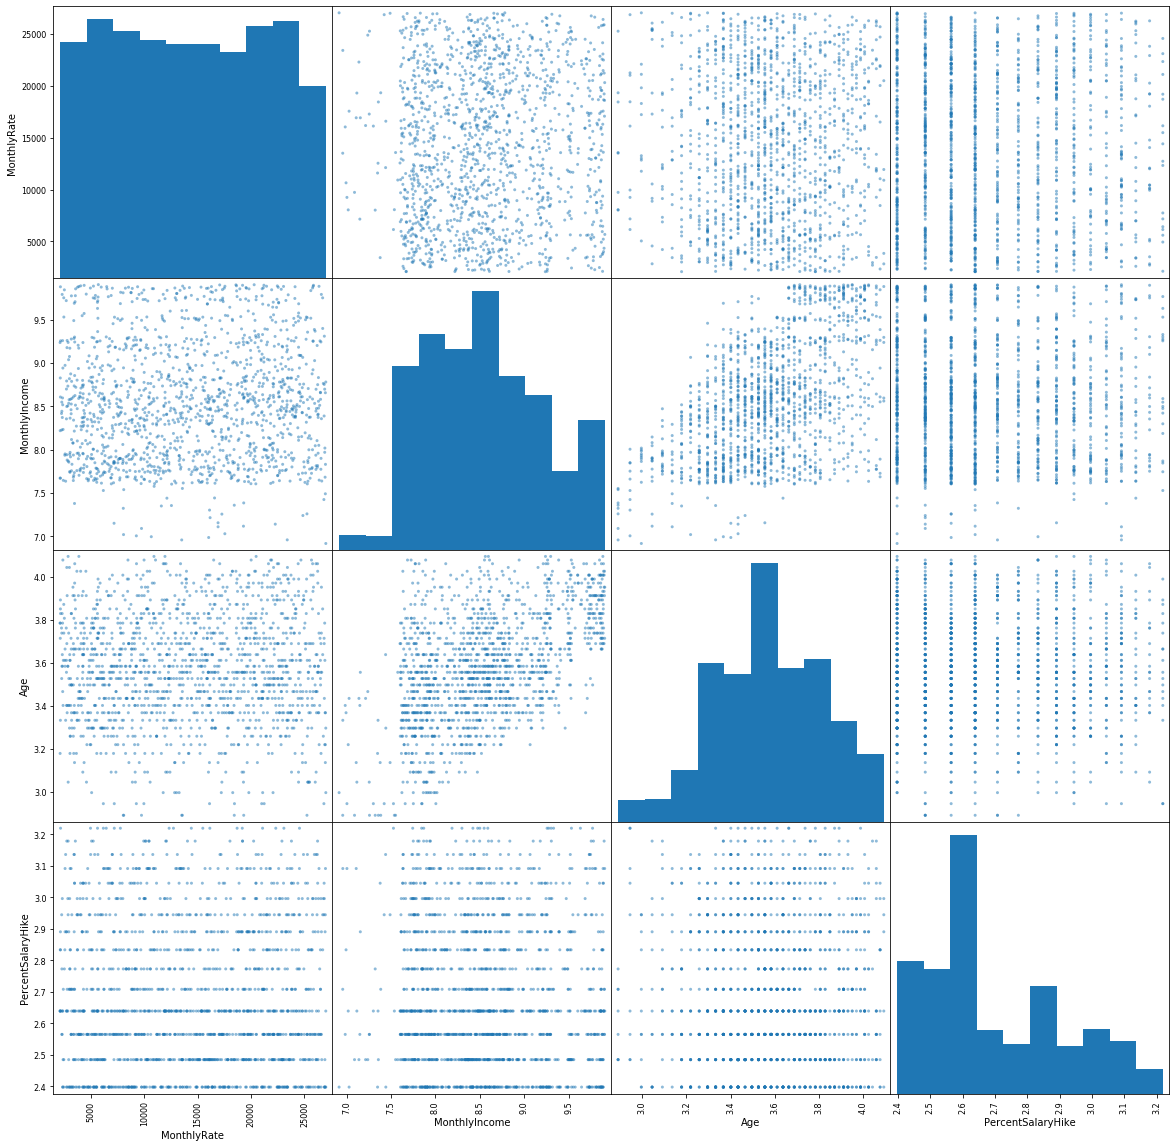

In [11]:
data_correlations = data_performance.iloc[:,[4,3,0,6]]
scatter_matrix(data_correlations,figsize=(20,20))
plt.show()

'MonthlyRate' doesn't seem to have strong correlation with 'MonthlyIncome', 'Age', and 'PercentSalarHike'. The spots scatter evenly at every scale of these three variables. The only correlation we can see in this chart is between 'MonthlyIncome' and 'Age'. Younger workers tend to have lower monthly income. 

# Predictive Model

In [12]:
Y = data_performance.loc[:,['MonthlyRate']]
X = data_performance.loc[:,['MonthlyIncome','Age','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear',
                            'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
                            'Education_1','Education_2','Education_3','Education_4','Education_5',
                            'JobSatisfaction_1','JobSatisfaction_2','JobSatisfaction_3','JobSatisfaction_4',
                            'Gender','OverTime','JobRole']]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train,Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [13]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
rf.score(X_validation, Y_validation)
predictions = rf.predict(X_validation)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_validation, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_validation, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_validation, predictions)))

Mean Absolute Error: 6782.980952380952
Mean Squared Error: 62875611.61108845
Root Mean Squared Error: 7929.41432963926


The mean absolute error, mean squared error, and root mean squared error are all extremely high. It means the dataset doesn't fit the predictive model. The predictions are a lot different than the actual values. The reason could be the outcome variable of the dataset has large values, so the results also tend to be large after the calculation. Another reason could be the outcome variable is independent of all the other variables. None of the variables are the true factors affecting the outcome vairable. Therefore, the model is not trained well enough to produce an accurate prediction. 

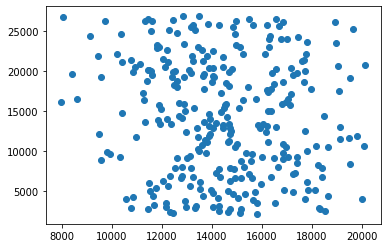

In [14]:
plt.scatter(predictions, Y_validation)
plt.show()

The scatter plot shows the correlation between the predicted and actual values of the outcome variable. An accurate prediction would show a upward-sloping pattern. We can see there isn't a clear pattern, symbolizing there's no correlation. The actual values can be a lot different from the predicted values. The predictive power of the data analysis is pretty low. 

In [15]:
feature_importances = pd.DataFrame(rf.feature_importances_,
    index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
MonthlyIncome,0.211069
Age,0.128215
PercentSalaryHike,0.087392
TotalWorkingYears,0.083905
YearsInCurrentRole,0.064346
TrainingTimesLastYear,0.061053
YearsSinceLastPromotion,0.058773
YearsAtCompany,0.057158
YearsWithCurrManager,0.051530
Gender,0.031481


Importance shows the extent to which a variable affects the outcome. We can see from this chart that 'MonthlyIncome', 'Age', and 'PercentSalaryHike' are the three most important variables to the outcome. Below I'll perform partial dependence plots of these three explanatory vairables to see their influences on monthly rate when all the other predictors are held constant. 

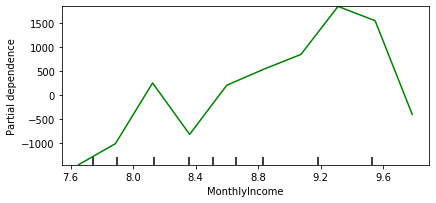

In [16]:
gb = GradientBoostingRegressor()
gb.fit(X_train, Y_train)
my_plots = plot_partial_dependence(gb,       
                                   features=[0],
                                   X=X_train, 
                                   feature_names=X_train.columns.values,
                                   grid_resolution=10)

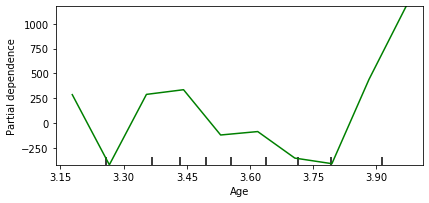

In [17]:
my_plots = plot_partial_dependence(gb,       
                                   features=[1],
                                   X=X_train, 
                                   feature_names=X_train.columns.values,
                                   grid_resolution=10)

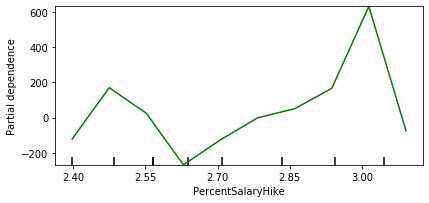

In [18]:
my_plots = plot_partial_dependence(gb,       
                                   features=[2],
                                   X=X_train, 
                                   feature_names=X_train.columns.values,
                                   grid_resolution=10)

In [19]:
print(math.exp(8.4))
print(math.exp(9.4))
print(math.exp(3.8))
print(math.exp(2.65))
print(math.exp(3))

4447.066747699858
12088.380730216988
44.701184493300815
14.1540386453758
20.085536923187668


The main conclusions we can make are:
1. For the workers who have monthly income from USD4,447 to USD12,088, the higher income they have, the higher monthly rate is. For the workers who have monthly income above USD12,088, the higher income they have, the lower monthly rate is. Overall, 'MonthlyIncome' presents a positive correlation with 'MonthlyRate'.
2. Generally, age is not associated with monthly rate, but for people who age above 44 years old, there is positive association with the monthly rate. 
3. For the workers who have pay rise between 14% and 20%, there is positive correlation between the pay rise and the monthly rate. Yet, if the pay rise is above 20%, the pay rise is negatively associated with the monthly rate. 

It is reasonable that income and pay rise are positively associated with monthly rate. However, this association could reach a limit. Due to the marginal effect, a worker is less motivated by the same amount of income increase when he is at a higher income level. He is less likely to be tempted by income increase to put more efforts into work when he has already received enough reward. This explains why people with income above USD12,088 and pay rise above 20% could have lower monthly rate when they received even more money. On the other hand, people who age above 44 could perform better by years. It is possibly because these people are more familiar with the company's affair. However, that if it is related to their working experience is uncertain. I delved into this with a few more charts below. 

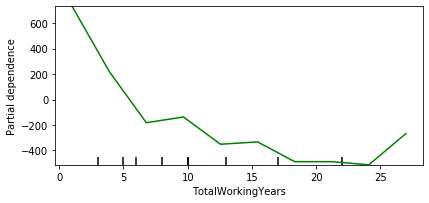

In [20]:
my_plots = plot_partial_dependence(gb,       
                                   features=[3],
                                   X=X_train, 
                                   feature_names=X_train.columns.values,
                                   grid_resolution=10)

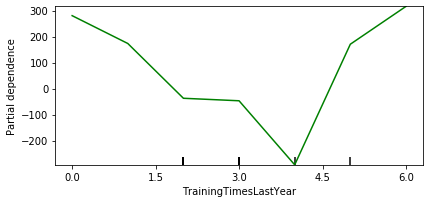

In [21]:
my_plots = plot_partial_dependence(gb,       
                                   features=[4],
                                   X=X_train, 
                                   feature_names=X_train.columns.values,
                                   grid_resolution=10)

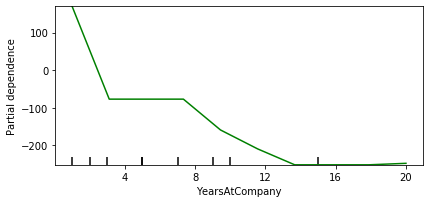

In [22]:
my_plots = plot_partial_dependence(gb,       
                                   features=[5],
                                   X=X_train, 
                                   feature_names=X_train.columns.values,
                                   grid_resolution=10)

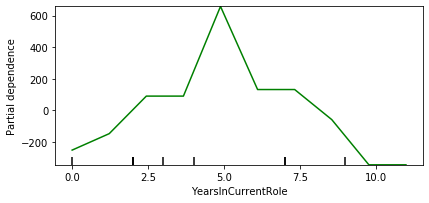

In [23]:
my_plots = plot_partial_dependence(gb,       
                                   features=[6],
                                   X=X_train, 
                                   feature_names=X_train.columns.values,
                                   grid_resolution=10)

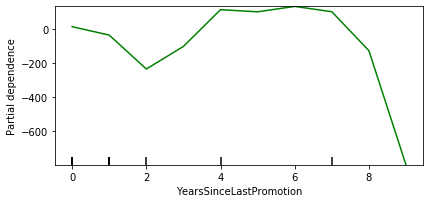

In [24]:
my_plots = plot_partial_dependence(gb,       
                                   features=[7],
                                   X=X_train, 
                                   feature_names=X_train.columns.values,
                                   grid_resolution=10)

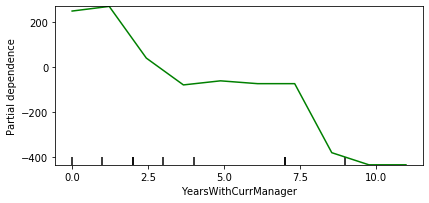

In [25]:
my_plots = plot_partial_dependence(gb,       
                                   features=[8],
                                   X=X_train, 
                                   feature_names=X_train.columns.values,
                                   grid_resolution=10)

We can observe some interesting relations:
- Total working years, years at company, and years with current manager is negatively associated. 
- Training times last year reaches its minimum at 4. 
- Years in current role reaches its maximum at year 5. 
- Years since last promotion is negatively associated after year 7. 

The data shows people perform better when they just started their job or switched to a new manager. We may usually consider having more work experiences is beneficial to the performance, but actually the rookies might perform better because of the tension of new environment. Trainings make the employees perform worse until they have attended more than four times. Perhaps training only works when you are constantly exposed to it instead of once in a while. Employees have the best performance at the fifth year of their current role and after that they will start to go down the slope. Five year is suggested to be the perfect length for workers to stay in the same position. In the first seven years after promotion, employee performance is barely associated with the time. However, the performance begins to drop after year 7, which indicates promotion should be given every 7 years to boost up productivity. As for the reason why people aging above 44 could better by years, it may be linked to the fact that they have higher income instead of their work experiences. Our research shows longer working years leads to worse employee performance. Whereas age and monthly income is positively correlated, which could explain the higher performance score. 

The data analysis provides some thoughts for managers to improve their employee performance. The most effective way is to raise their income and pay rise. They should nonetheless notice not to raise above a certain extent since excessive reward is not helpful. Second, they could recruit new employees more often for they have better performance due to less working years. Otherwise, they can arrange personnel change regularly since staying at the same position for too long wear out the passion for work. The manager can reassign job role or give promotion every 5 to 7 years, which is suggested to be the perfect timing for change. In addition, training should be taken place for more than 5 times per year since occasional ones make little influence. 

All in all, though this data analsis doesn't have enough accuracy and predictive power, it does provide some directions for practical implementations. The root cause of not having enough accuracy could be missing important variables. None of the variables in the current dataset has importance more than 20%, and the correlation chart and scatter plot show there's little correlation between the outcome variable and the explanatory variables. More variables need to be included in the analysis to find the key factors of the outcome. Second, the outcome variable has large values and can easily leads to large errors. Perhaps there're alternative ways to evaluate employee performance to make the values smaller and more comprehensive. In this way, the results can be further improved and contribute more to enhancing employee performance. 